In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=1f0dffc8ed7f193a1cc2412bcc3b0cbca2831933473657f0928720d6a71a4636
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=65f4b9329116f536f45f0edd284efce8738874c74674396bf4e72c88df6b946b
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk; nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
consumer_key="bc7OoZ09GIATOldylYMT5l071"
consumer_secret="sFeb9vrdPMzv7JdHldL4bGHgHx0GTeQB0xL3aDWz0Mt2nnYqJl"
access_token="1388521805271375878-MnmGP3qg1KOxeIMG2L5BywtNkxGQas"
access_token_secret="djotPBXWyiffdm0jWmYElFpQh24CSBQ0eZ8PWZfjBWNXY"

In [ ]:
# Authentication
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#date_tweets = tweepy.Cursor(api.search, q="@derkern", since="2020-5-31", tweet_mode='extended').items(100)

In [ ]:
tweets = tweepy.Cursor(api.user_timeline, screen_name="Stocks" ,date_since = "2006-01-01" ,date_until = "2022-03-31", tweet_mode='extended').items(500)

In [ ]:
list = []
for tweet in tweets:
    text = tweet._json["full_text"]

    refined_tweet = {'Tweets' : text,

                    'Date' : tweet.created_at}
    
    list.append(refined_tweet)

In [ ]:
df = pd.DataFrame(list)
df

,Tweets,Date
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51
2,Now hiring: Wir suchen per 1. August 2014 oder...,2014-05-16 09:13:20
3,"Social Network: Facebook, Twitter &amp; Co. – ...",2014-02-14 10:30:57
4,Tage der Wahrheit: Jetzt gehts auch bei uns mi...,2014-01-24 11:51:09
...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02


In [ ]:
def clean(tex):
    tex = re.sub(r"@[A-Za-z0-9]+","",tex)
    tex = re.sub(r"#","",tex)
    tex = re.sub(r":","",tex)
    tex = re.sub(r"RT[\s]","",tex)
    tex = re.sub(r"https?:\/\/S+","",tex)
    return tex
df["Tweets"]=df["Tweets"].apply(clean)
df

,Tweets,Date
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51
2,Now hiring Wir suchen per 1. August 2014 oder ...,2014-05-16 09:13:20
3,"Social Network Facebook, Twitter &amp; Co. – A...",2014-02-14 10:30:57
4,Tage der Wahrheit Jetzt gehts auch bei uns mit...,2014-01-24 11:51:09
...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02


In [ ]:
# subjectivity(opinion on the text)
def get_subject(tex):
    return TextBlob(tex).sentiment.subjectivity
# polarity (how positive or negative of the text)
def get_pola(tex):
    return TextBlob(tex).sentiment.polarity
for index, row in df["Tweets"].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score["neg"]
        neu = score["neu"]
        pos = score["pos"]
        comp = score["compound"]
        df.loc[index, "Negative"] = neg
        df.loc[index, "Neutral"] = neu
        df.loc[index, "Positive"] = pos
        df.loc[index, "Compound"] = comp
    
df["Subjectivity"]=df["Tweets"].apply(get_subject)
df["Polarity"]=df["Tweets"].apply(get_pola)

df

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59,0.000,1.000,0.0,0.0000,0.000000,0.000000
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51,0.000,1.000,0.0,0.0000,0.000000,0.000000
2,Now hiring Wir suchen per 1. August 2014 oder ...,2014-05-16 09:13:20,0.000,1.000,0.0,0.0000,0.000000,0.000000
3,"Social Network Facebook, Twitter &amp; Co. – A...",2014-02-14 10:30:57,0.000,1.000,0.0,0.0000,0.066667,0.033333
4,Tage der Wahrheit Jetzt gehts auch bei uns mit...,2014-01-24 11:51:09,0.178,0.822,0.0,-0.5994,0.000000,0.000000
...,...,...,...,...,...,...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37,0.000,1.000,0.0,0.0000,0.000000,0.000000
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12,0.000,1.000,0.0,0.0000,0.000000,0.000000
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09,0.000,1.000,0.0,0.0000,0.000000,0.000000
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02,0.000,1.000,0.0,0.0000,0.000000,0.000000


In [ ]:
def sentiAnalysis(value):
    if value > 0:
        return "Positive"
    elif value == 0:
        return "Neutral"
    else:
        return "Negative"
df["Sentiment_Analysis"]=df["Polarity"].apply(sentiAnalysis)
df

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
2,Now hiring Wir suchen per 1. August 2014 oder ...,2014-05-16 09:13:20,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
3,"Social Network Facebook, Twitter &amp; Co. – A...",2014-02-14 10:30:57,0.000,1.000,0.0,0.0000,0.066667,0.033333,Positive
4,Tage der Wahrheit Jetzt gehts auch bei uns mit...,2014-01-24 11:51:09,0.178,0.822,0.0,-0.5994,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral


In [ ]:
df_negative = df[df["Sentiment_Analysis"]=="Negative"]
df_negative

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
66,«The physical offtake in silver is enormous. I...,2013-03-07 02:59:45,0.0,1.000,0.000,0.0000,0.547619,-0.033333,Negative
158,"«Bonds are incredibly dangerous, insanely risk...",2013-01-03 22:07:18,0.3,0.398,0.302,0.0112,0.925000,-0.200000,Negative
387,Kuoni im Minus http//t.co/O1OitGLA,2012-11-08 08:00:07,0.0,1.000,0.000,0.0000,0.100000,-0.100000,Negative


In [ ]:
df_positive = df[df["Sentiment_Analysis"]=="Positive"]
df_positive

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
3,"Social Network Facebook, Twitter &amp; Co. – A...",2014-02-14 10:30:57,0.0,1.000,0.000,0.0000,0.066667,0.033333,Positive
23,Kleines Bettmümpfeli für alle Nacht-Twitterer...,2013-10-16 21:12:33,0.0,1.000,0.000,0.0000,0.500000,0.170455,Positive
36,Small is beautiful – auch beim Thema Aktien. A...,2013-08-23 10:00:17,0.0,0.769,0.231,0.5994,0.700000,0.300000,Positive
40,"Welcome back, America! Eine der vielen Schlagz...",2013-08-09 09:58:23,0.0,0.785,0.215,0.5093,0.450000,0.400000,Positive
47,Zu Toni und Vroni Inwieweit werden Social Med...,2013-07-23 06:49:32,0.0,1.000,0.000,0.0000,0.066667,0.033333,Positive
56,"Leaderwechsel an der Börse. Happy Birthday, SM...",2013-06-28 13:23:33,0.0,0.810,0.190,0.6114,1.000000,1.000000,Positive
86,«Investors would be wise to add to their gold ...,2013-02-05 21:31:56,0.0,0.853,0.147,0.4767,0.950000,0.287500,Positive
98,Telefónica Deutschland mobiles Bezahlen per Ha...,2013-01-21 16:17:43,0.0,1.000,0.000,0.0000,0.900000,0.600000,Positive
112,Bundesbank holt fast 700 Tonnen Gold nach Haus...,2013-01-16 14:54:14,0.0,1.000,0.000,0.0000,0.600000,0.200000,Positive
209,Credit Suisse streicht 120 Stellen in New York...,2012-12-11 11:54:31,0.0,0.794,0.206,0.3818,0.454545,0.136364,Positive


In [ ]:
df_neutral = df[df["Sentiment_Analysis"]=="Neutral"]
df_neutral

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
2,Now hiring Wir suchen per 1. August 2014 oder ...,2014-05-16 09:13:20,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
4,Tage der Wahrheit Jetzt gehts auch bei uns mit...,2014-01-24 11:51:09,0.178,0.822,0.0,-0.5994,0.0,0.0,Neutral
5,stocksDIGITAL http//t.co/eb30EdxNBQ,2014-01-24 11:49:28,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02,0.000,1.000,0.0,0.0000,0.0,0.0,Neutral


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
pc=count_values_in_column(df,"Sentiment_Analysis")
pc

,Total,Percentage
Neutral,481,96.2
Positive,16,3.2
Negative,3,0.6


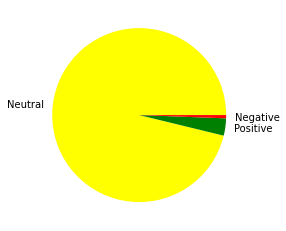

<Figure size 1000x1000 with 0 Axes>

In [ ]:
names=pc.index
size=pc["Percentage"]
plt.pie(size, labels=names, colors=["yellow","green","red"])
plt.style.use("default")
plt.figure(figsize=(10,10))
plt.show()

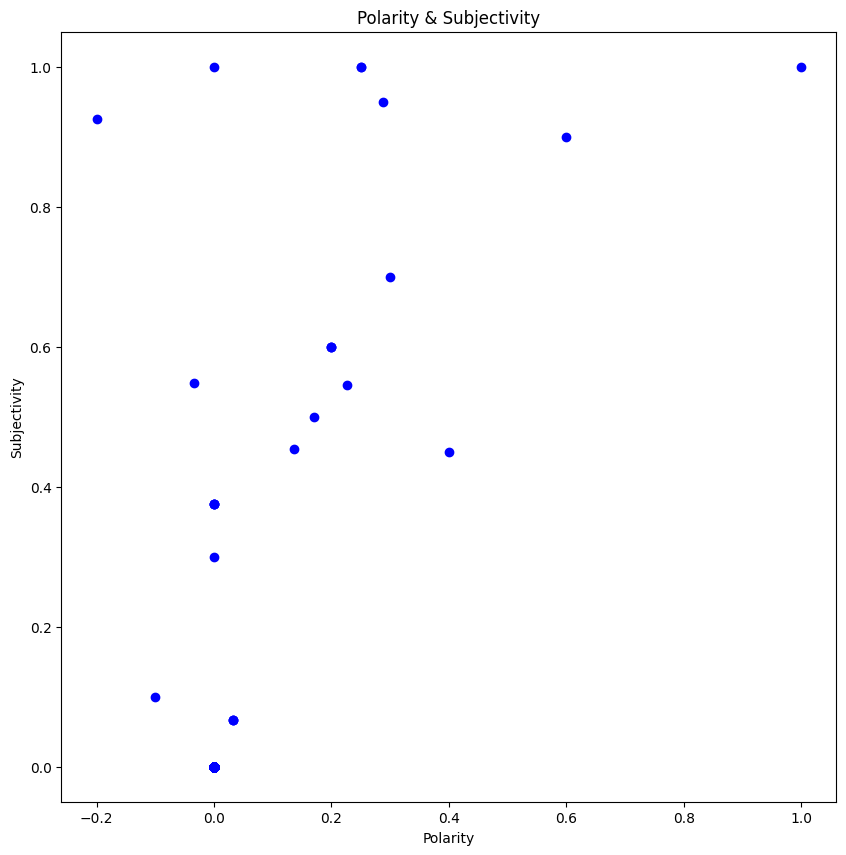

In [ ]:
plt.figure(figsize=(10,10))
for i in range (0,df.shape[0]):
    plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color="Blue")
plt.title("Polarity & Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

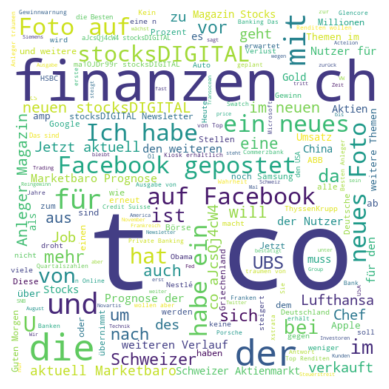

In [ ]:
allwords=" ".join([twts for twts in df["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

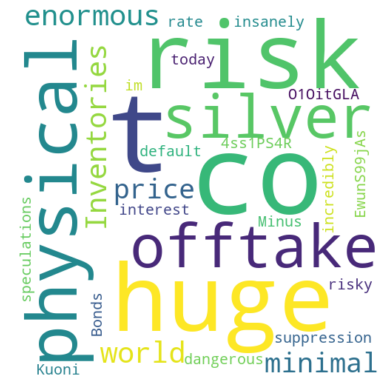

In [ ]:
allwords_negative=" ".join([twts for twts in df_negative["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_negative)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

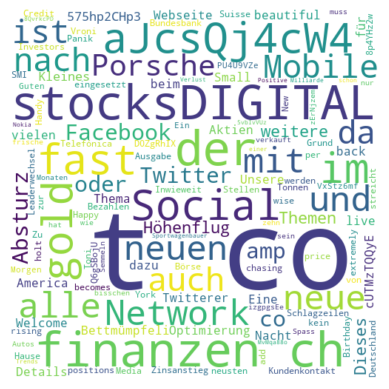

In [ ]:
allwords_positive=" ".join([twts for twts in df_positive["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_positive)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

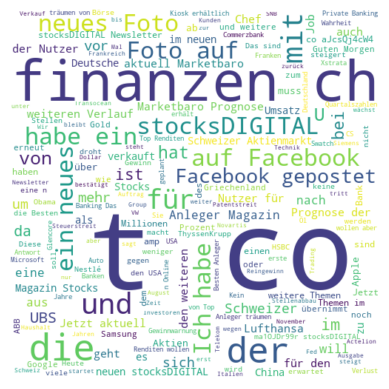

In [ ]:
allwords_neutral=" ".join([twts for twts in df_neutral["Tweets"]])
wordcloud=WordCloud(width=500,height=500,background_color="white",random_state=24,max_font_size=150).generate(allwords_neutral)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

In [ ]:
df["text_len"] = df["Tweets"].astype(str).apply(len)
df["text_word_count"] = df["Tweets"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(df.groupby("Sentiment_Analysis").text_len.mean()),2)

,text_len
Sentiment_Analysis,
Negative,101.33
Neutral,85.73
Positive,92.62


In [ ]:
round(pd.DataFrame(df.groupby("Sentiment_Analysis").text_word_count.mean()),2)

,text_word_count
Sentiment_Analysis,
Negative,13.00
Neutral,10.17
Positive,12.06


In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', "", text)
 return text
df["punct"] = df["Tweets"].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split("\W+", text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df

,Tweets,Date,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Wie Kandidaten für CEO-Posten gesucht werden. ...,2018-03-03 08:39:59,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,91,8,Wie Kandidaten für CEOPosten gesucht werden ht...,"[wie, kandidaten, für, ceoposten, gesucht, wer...","[wie, kandidaten, für, ceoposten, gesucht, wer...","[wie, kandidaten, für, ceoposten, gesucht, wer..."
1,Wir suchen per 1. August 2014 oder nach Verein...,2014-05-16 10:41:51,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,137,19,Wir suchen per 1 August 214 oder nach Vereinba...,"[wir, suchen, per, 1, august, 214, oder, nach,...","[wir, suchen, per, 1, august, 214, oder, nach,...","[wir, suchen, per, 1, august, 214, oder, nach,..."
2,Now hiring Wir suchen per 1. August 2014 oder ...,2014-05-16 09:13:20,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,125,17,Now hiring Wir suchen per 1 August 214 oder na...,"[now, hiring, wir, suchen, per, 1, august, 214...","[hiring, wir, suchen, per, 1, august, 214, ode...","[hire, wir, suchen, per, 1, august, 214, oder,..."
3,"Social Network Facebook, Twitter &amp; Co. – A...",2014-02-14 10:30:57,0.000,1.000,0.0,0.0000,0.066667,0.033333,Positive,140,19,Social Network Facebook Twitter amp Co Abstur...,"[social, network, facebook, twitter, amp, co, ...","[social, network, facebook, twitter, amp, co, ...","[social, network, facebook, twitter, amp, co, ..."
4,Tage der Wahrheit Jetzt gehts auch bei uns mit...,2014-01-24 11:51:09,0.178,0.822,0.0,-0.5994,0.000000,0.000000,Neutral,133,19,Tage der Wahrheit Jetzt gehts auch bei uns mit...,"[tage, der, wahrheit, jetzt, gehts, auch, bei,...","[tage, der, wahrheit, jetzt, gehts, auch, bei,...","[tage, der, wahrheit, jetzt, geht, auch, bei, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Zurich unter Druck | 17.10.12 | finanzen.ch ht...,2012-10-17 12:03:37,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,63,8,Zurich unter Druck 17112 finanzench httptcoY...,"[zurich, unter, druck, 17112, finanzench, http...","[zurich, unter, druck, 17112, finanzench, http...","[zurich, unter, druck, 17112, finanzench, http..."
496,Bank of America mit Gewinneinbruch | 17.10.12 ...,2012-10-17 12:03:12,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,79,10,Bank of America mit Gewinneinbruch 17112 fin...,"[bank, of, america, mit, gewinneinbruch, 17112...","[bank, america, mit, gewinneinbruch, 17112, fi...","[bank, america, mit, gewinneinbruch, 17112, fi..."
497,Weltgrösster Bergbaukonzern BHP Billiton hält ...,2012-10-17 08:38:09,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,129,13,Weltgrösster Bergbaukonzern BHP Billiton hält ...,"[weltgrösster, bergbaukonzern, bhp, billiton, ...","[weltgrösster, bergbaukonzern, bhp, billiton, ...","[weltgrösster, bergbaukonzern, bhp, billiton, ..."
498,US-Börsencrash 1987\nTagescrash vor 25 Jahren ...,2012-10-17 08:37:02,0.000,1.000,0.0,0.0000,0.000000,0.000000,Neutral,130,16,USBörsencrash 187\nTagescrash vor 25 Jahren W...,"[usbörsencrash, 187, tagescrash, vor, 25, jahr...","[usbörsencrash, 187, tagescrash, vor, 25, jahr...","[usbörsencrash, 187, tagescrash, vor, 25, jahr..."


In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df["Tweets"])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))


count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

500 Number of reviews has 1982 words


,,ab,abb,abbau,abbaumassnahmen,abbfinanzchef,aber,abgeschlossen,abgesehen,abkommen,...,ölpreis,über,überflüssig,übergab,überholspur,übernahm,übernahmegesprächen,übernimmt,übernommen,überraschend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
der,90
die,77
für,57
und,49
auf,48
ein,45
mit,44
stocksdigit,44
neue,38
im,38


In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df["Tweets"],(2,2),20)
n2_bigrams

[('finanzen ch', 226),
 ('ch http', 226),
 ('12 finanzen', 172),
 ('11 12', 95),
 ('01 13', 53),
 ('13 finanzen', 53),
 ('12 12', 48),
 ('10 12', 40),
 ('stocksdigital http', 33),
 ('ich habe', 26),
 ('habe ein', 26),
 ('ein neues', 26),
 ('neues foto', 26),
 ('foto auf', 26),
 ('auf facebook', 26),
 ('facebook gepostet', 26),
 ('gepostet http', 26),
 ('im neuen', 11),
 ('neuen stocksdigital', 11),
 ('12 11', 11)]

In [ ]:
n3_trigrams = get_top_n_gram(df["Tweets"],(3,3),20)
n3_trigrams

[('finanzen ch http', 226),
 ('12 finanzen ch', 172),
 ('11 12 finanzen', 88),
 ('01 13 finanzen', 53),
 ('13 finanzen ch', 53),
 ('12 12 finanzen', 45),
 ('10 12 finanzen', 39),
 ('ich habe ein', 26),
 ('habe ein neues', 26),
 ('ein neues foto', 26),
 ('neues foto auf', 26),
 ('foto auf facebook', 26),
 ('auf facebook gepostet', 26),
 ('facebook gepostet http', 26),
 ('im neuen stocksdigital', 11),
 ('12 11 12', 11),
 ('18 10 12', 11),
 ('jetzt aktuell marketbaro', 10),
 ('aktuell marketbaro prognose', 10),
 ('marketbaro prognose der', 10)]